# Fourier Transform

This lesson is a brief introduction to the Fourier Transform. The Fourier Transform is an extremely deep mathematical concept that ties into many different disciplines. Still, these next couple of lessons will teach you how to use it as a tool to accomplish many practical tasks. We will not be going into any theory at all, and in fact, you won't see a single equation in these lessons. The goal here is to convey some intuition about this concept, and while a strong theoretical understanding is important, it's outside the scope of this class.

Let's start with our traditional imports.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpld3
import scipy as sp
from scipy import io

## Adding Sinusoids

Let's make some sinusoids.

In [2]:
fs = 125
ts = np.arange(0, 10, 1/fs)
s2 = np.sin(2 * np.pi * 2 * ts)
s3 = np.sin(2 * np.pi * 3 * ts)

In [3]:
%matplotlib inline

Let's plot the 2 sinusoids and their sum.

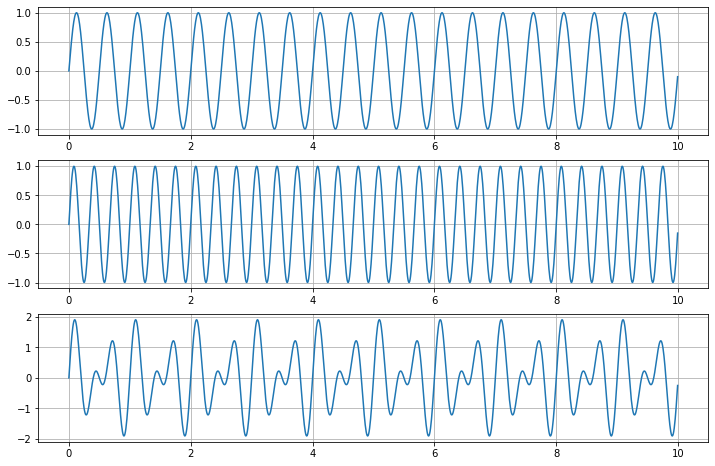

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(ts, s2)
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(ts, s3)
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(ts, s2 + s3)
plt.grid()

The sum of two sinusoids is simply the elementwise sum at each time point. However, this means that they must be sampled synchronously. If they are not, you need to interpolate one on to the other.

## Signal Reconstruction

Let's now look at a real-world accelerometer signal collected at the wrist during walking.

In [5]:
sig = sp.io.loadmat('DATA_11_TYPE02.mat')['sig']

In [6]:
fs = 125
seg = sig[3][9000:10000]
seg -= np.mean(seg)

In [7]:
%matplotlib inline

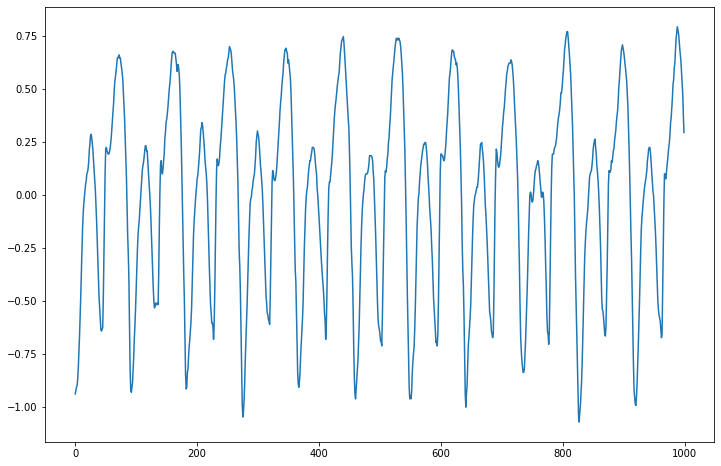

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(seg)

## Fourier Transform Demo

The Fourier Transform tells us that any signal can be reconstructed by summing sinusoids of various frequencies, amplitudes, and phase shifts together.

Let's see this in action.

In [9]:
freqs = np.fft.rfftfreq(len(seg), 1/fs)
rfft = np.fft.rfft(seg)
order = np.argsort(np.abs(rfft))[::-1]
most_imp_freqs = list(zip(freqs[order], rfft[order]))

In [10]:
%matplotlib qt

In [ ]:
plot=True
seg_rec = np.zeros(len(seg), dtype='complex128')
ts = np.arange(len(seg)) / len(seg)
n = 0
plt.clf()
fig = plt.gcf()
ax10 = fig.add_subplot(3, 1, 1)
ax11 = fig.add_subplot(3, 1, 2)
ax12 = fig.add_subplot(3, 1, 3)
ax10.plot(seg)
ax11.plot(seg_rec, 'g')
ax12.plot(seg)
ax12.plot(seg_rec, 'g')
fig.suptitle('0 sinusoids')
plt.pause(10)
for f, a in most_imp_freqs:
    seg_rec += a / len(seg) * np.exp(2j * np.pi * f / (fs / len(seg)) * ts)
    seg_rec += np.conj(a) / len(seg) * np.exp(2j * np.pi * -f / (fs / len(seg)) * ts)
    n += 1
    if plot:
        ax11.clear()
        ax11.plot(seg_rec, 'g')
        ax12.lines.pop()
        ax12.plot(seg_rec, 'g')
        fig.suptitle('{} sinusoids'.format(n))
        if n == 1:
            plt.pause(2)
        elif n < 5:
            plt.pause(1)
        elif n < 15:
            plt.pause(0.5)
        elif n < 120:
            plt.pause(0.005)
        else:
            break

/home/mlt/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mlt/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mlt/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mlt/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


This is basically a demonstration that Fourier is not lying to us when he says that any signal can be recreated by a sum of sinusoids. The frequency of the specific sinusoids that make up a signal can tell us important information that we can use to build algorithms to process that signal.

## Nyquist Frequency


Now that we know that signals are made up of different frequency components, we can learn about a new property of sampling theory -- the **Nyquist frequency**. The Nyquist frequency tells us that when we sample an analog signal, based on the frequency components it's made up of, there are restrictions on how fast we need to sample that signal.

In [ ]:
%matplotlib osx

Let's see a graphical explanation of this.

In [ ]:
def PlotSinSample(ax, fsin, cfs, fs, drop_bg=False):
    cts = np.arange(0, 5, 1/cfs)
    cs0 = np.cos(2 * np.pi * fsin * cts)
    ts = np.arange(0, 5, 1/fs)
    s0 = np.cos(2 * np.pi * fsin * ts)
    ax.clear()
    if not drop_bg:
        ax.plot(cts, cs0)
    ax.plot(ts, s0, 'b.', ms=10)        
    ax.grid()
    ax.set_title('{:0.2f} Hz'.format(fsin))

In this demo, you can see what a digitized version of the analog signal would look like at various sampling rates. As we decrease the sampling rate, there will come a point where we only have two samples per period of the sine wave. If we sample any slower than this, the sine wave will look the same as a lower frequency wave and we won't be able to know the true frequency of the wave when all we have is the digitized signal.

The Nyquist frequency tells us the maximum frequency analog signal we can sample is half of our sampling rate. If we try to sample a signal that has higher frequency components than this, we will see **aliasing**, which means those high-frequency components will show up at mirrored lower frequencies.

In [ ]:
plt.clf()
fig = plt.gcf()
ax = fig.add_subplot(1, 1, 1)
fsins = np.arange(1, 5.1, 0.2)
for fsin in fsins:
    PlotSinSample(ax, fsin, 150, 10)
    plt.draw()
    while not plt.waitforbuttonpress():
        pass

fig.clf()
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)
while True:
    PlotSinSample(ax0, 6, 150, 10)
    PlotSinSample(ax1, 4, 150, 10)
    plt.draw()
    if not plt.waitforbuttonpress():
        break
    PlotSinSample(ax0, 6, 150, 10, drop_bg=True)
    PlotSinSample(ax1, 4, 150, 10, drop_bg=True)
    plt.draw()
    if not plt.waitforbuttonpress():
        break

fig.clf()
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)
fsins = np.arange(5, 10.1, 0.2)
for fsin in fsins:
    PlotSinSample(ax0, fsin, 150, 10)
    PlotSinSample(ax1, 10 - fsin, 150, 10)
    plt.draw()
    while not plt.waitforbuttonpress():
        pass




Hopefully, these explanations provide you with enough intuition so that in the next video, we can begin to see how to use the Fourier Transform to accomplish specific tasks.

This topic is non-intuitive at first, so if you're confused, that's ok. Try watching this video again to let the information sink in and make sure to check out the further references. Feel free to play around in this notebook to explore these ideas more.